<a href="https://colab.research.google.com/github/tousif99/Netyflix-Show-_Clustering/blob/main/Unsupervised_Project_CODavengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Netflix Movie and TV Show Clustering**


##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual

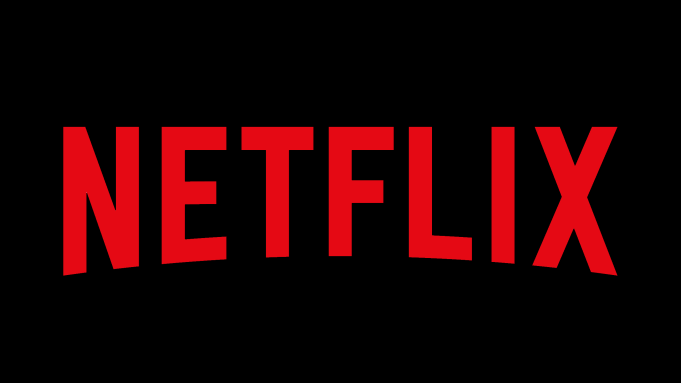

# **Project Summary -**

This project is ML unsupervised learning project. This is based on text based clustering hence, library like nltk, steming, stopwords, TF-IDF Vectorizer, PCA and visualization library like wordcloud and plotly are used. We have netflix data which has multiple text based column including, title, genre, description, casting, director etc. After EDA including data wrangling, handling missing data, univarient and bivarient analysis, we jumped to text based clustering.

Based on Silhouette Coefficient and kmeans we have made 14 clustering and label them based on description. Later, we also used cosine_similarity to provide an output based on user search and description similarity.

# **GitHub Link -**

# **Tousif sheikh** - https://github.com/tousif99/Netyflix-Show-_Clustering

# **Mohammad Sufawan** - https://github.com/sufawan20/Netflix-movies-and-TV-shows-Clustering/blob/main/Unsupervised_Project_CODavengers.ipynb

# **Problem Statement -**

Business Context

This dataset consists of tv shows and movies avaliable on Netflix as of 2019. The dataset is collected from Flixable which is a thrid-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external dataset such as IMDB rating, can also provide many interesting findings.

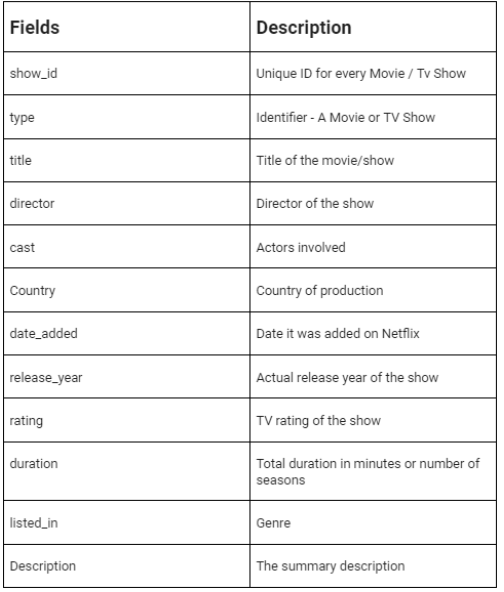

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.


# ***Let's Begin !***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Netflix data/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [ ]:
#head of data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
#basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
# Finding out null columns only
df.isnull().sum()[df.isnull().sum().sort_values(ascending = False) != 0]

director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64

In [ ]:
null_columns = df.isnull().sum()[df.isnull().sum().sort_values(ascending = False) != 0]

In [ ]:
null_columns

director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64

<BarContainer object of 5 artists>

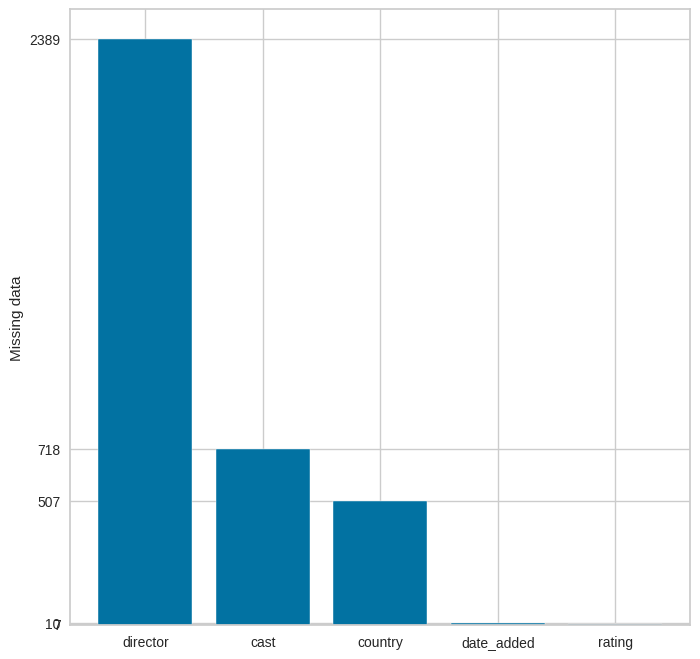

In [ ]:
plt.figure(figsize = (8,8))
plt.xticks(np.arange(len(null_columns)),null_columns.index, rotation = 0)
plt.yticks(null_columns,rotation=0)
plt.ylabel('Missing data')
plt.bar(np.arange(len(null_columns)), null_columns)


## <b> Handling Missing value

In [ ]:
df.director.nunique()

4049

In [ ]:
#Handling Null Values
df['director'].fillna(value='No Director',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

In [ ]:
#Handling Null Values
df['cast'].fillna(value='No Cast',inplace=True)

In [ ]:
#Handling Null Values
df['cast'].fillna(value='No Cast',inplace=True)

## <b>  Date Added

In [ ]:
# Changing date added to datetime object
df["date_added"] = pd.to_datetime(df["date_added"])

In [ ]:
# Extracting important information from date_added column
df["Year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

## Now we don't have any null value

In [ ]:
#Looking for unique values
df.nunique()

## <b> Univarient Analysis

In [ ]:
# Type has 2 unique catagory as Movie and TV Shows
df.type.value_counts()

In [ ]:
# Visulization of Type column
plt.rcParams["figure.figsize"] = (5,5)
ax = sns.countplot(x='type', data = df)
ax.set_xlabel("Type")
ax.set_ylabel("Count")
ax.set_title("Count of Type")
# Add annotations on top of each bar with the counts
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

## <B> Almost 70% data belongs to Movies and only 30% data belongs to TV Shows

## Visualization using plotly

In [ ]:
# Visulization of type column
import plotly.express as px
fig = px.pie(df, names='type', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()


In [ ]:
# Visulization of Rating column
import plotly.express as px
fig = px.pie(df, names='rating', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [ ]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
df.pivot_table(index='title', aggfunc='size').head()

In [ ]:
#subsetting df
df_word_cloud = df['title']
text = " ".join(word for word in df_word_cloud)

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(width=1200, height=1000, stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### **Inference:** It seems like words like "Christmas", "Love", "Man", "World", "Story" are very common in titles.

In [ ]:
excluded_director = ["No Director"]

# Filter the DataFrame to exclude specific directors
filtered_df = df[~df['director'].isin(excluded_director)]

# Perform value count calculation on the filtered DataFrame
top_directors = filtered_df['director'].value_counts().head(20)

fig = px.bar(top_directors, x=top_directors.index, y=top_directors.values, color=top_directors.index)
fig.update_layout(
    title='Directors with Most Movies/Shows',
    xaxis=dict(title='Director'),
    yaxis=dict(title='Count'),
    xaxis_tickangle=-45,
    showlegend=True,
    plot_bgcolor='rgb(255, 255, 255)'
)
fig.show()


## <b>  Cast

In [ ]:
df.cast.value_counts()

In [ ]:
# Convert the cast to get final df for actor
def convert_to_list(df):
  cast_count = {}
  cast_count_final = []
  cast_list = list(df["cast"])
  for each in range(len(cast_list)):
    cast_count_final.extend(str(cast_list[each]).split(","))
  for each in cast_count_final:
    if each not in cast_count:
      cast_count[each] = cast_count_final.count(each)
  return cast_count

In [ ]:
# Getting the same in variable
cast_df = convert_to_list(df)

# Creating a dataframe for cast & its counts
cast_df = pd.DataFrame.from_dict(cast_df, orient = "index", columns = ["Count"])

In [ ]:
# Understanding the top actors in the movies
cast_df.sort_values("Count", ascending = False).drop("No Cast")

In [ ]:
# Plot for Top Actors and Counts
plt.rcParams["figure.figsize"] = (20,10)
cast_df.sort_values("Count" , ascending = False).drop("No Cast").head(30).plot(kind= "bar", color = "magenta" )
plt.xlabel("Actors")
plt.ylabel("Total movies/tv series acted")
plt.title ("Actor vs Movies/TV acted")
plt.xticks(rotation = 80)

## <b>  Inference : Top Five actor with highest number of shows are Anupam Kher, Takahiro Sakurai, SRK, Ohm Puri & Boman Irani

In [ ]:
# Looking for countries and number of netflix productions
# Creating a list of tuples with Country name, total_count, tv_show count, & movie count
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(df)):
  if type(df['country'][i])== str:
    split=df['country'][i].split(',')
    for k in split:
      country_list.append(k.strip())
      if df['type'][i]=='TV Show':
        tv_show.append(k.strip())
      if df['type'][i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [ ]:
production_country

In [ ]:
Country_df = pd.DataFrame(production_country, columns = ["Country", "Production_Count", "TV-Shows", "Movies"])
Country_df = Country_df.sort_values("Production_Count", ascending = False)
Country_df = Country_df.reset_index()
Country_df = Country_df.drop("index", axis = 1)

In [ ]:
Country_df

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(name='Production Count', x=Country_df.head(10)['Country'], y=Country_df.head(10)['Production_Count']),
    go.Bar(name='TV Shows', x=Country_df.head(10)['Country'], y=Country_df.head(10)['TV-Shows']),
    go.Bar(name='Movies', x=Country_df.head(10)['Country'], y=Country_df.head(10)['Movies'])
])

fig.update_layout(
    barmode='group',
    xaxis=dict(title='Country'),
    yaxis=dict(title='Production Value'),
    title='Country-wise production distribution'
)

fig.show()

## <b>  Release Year

In [ ]:
df.info()

In [ ]:
df.release_year.value_counts()

In [ ]:
# Compute value counts of release_year
temp_df1 = df['release_year'].value_counts().reset_index()

# Create bar trace
trace1 = go.Bar(
    x=temp_df1['index'],
    y=temp_df1['release_year'],
    marker=dict(color='rgb(255, 165, 0)', line=dict(color='rgb(10, 0, 0)', width=1.5))
)

# Define layout
layout = go.Layout(
    template="simple_white",
    title='Content Release Over the Year',
    xaxis=dict(title='Rating'),
    yaxis=dict(title='Content Released')
)

# Create figure
fig = go.Figure(data=[trace1], layout=layout)

# Show figure
fig.show()


## Rating

In [ ]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].apply(lambda x: ratings[x] if x in ratings else 'Unknown')

In [ ]:
# Compute the count of each target age group
age_group_counts = df['target_ages'].value_counts()

# Create a bar trace
trace = go.Bar(
    x=age_group_counts.index,
    y=age_group_counts.values,
    marker=dict(color='rgb(0, 128, 128)')
)

# Define the layout
layout = go.Layout(
    title='Count of Target Age Groups',
    xaxis=dict(title='Target Age Groups'),
    yaxis=dict(title='Count')
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Show the figure
fig.show()


## As expected, hightest content is for Adults followed by Teens than older kids and than kids at last

## <b> Duration

In [ ]:
df.duration.unique()

In [ ]:
df.type.value_counts()

In [ ]:
df.info()

In [ ]:
df.show_id.nunique()

In [ ]:
df_Movie_duration = df[df["type"] == "Movie"][["show_id", "type", "duration"]]

In [ ]:
# Replacing 'min' from the duration and make it string data type
df_Movie_duration['duration'] = df_Movie_duration['duration'].str.replace(' min','')
df_Movie_duration['duration'] = df_Movie_duration['duration'].astype(str)

In [ ]:
# Creating a dataframe for TV Show
df_TVshow_duration = df[df["type"] == "TV Show"][["show_id", "type", "duration"]]

In [ ]:
df_TVshow_duration.duration.unique()

In [ ]:
# Replacing 'min' from the duration and make it string data type
df_TVshow_duration['duration'] = df_TVshow_duration['duration'].str.replace(r'\bSeasons?\b', '', regex=True)
df_TVshow_duration['duration'] = df_TVshow_duration['duration'].astype(str)

In [ ]:
df_Movie_duration["duration"] = np.where(df_Movie_duration["duration"].isnull(), 0, df_Movie_duration["duration"])
df_TVshow_duration["duration"] = np.where(df_TVshow_duration["duration"].isnull(), 0, df_TVshow_duration["duration"])

In [ ]:
df_Movie_duration['duration'] = df_Movie_duration['duration'].astype(int)
df_TVshow_duration["duration"] = df_TVshow_duration["duration"].astype(int)

In [ ]:
#Analysis the distribution on Movie duration
sns.set(style="darkgrid")
sns.kdeplot(data=df_Movie_duration[df_Movie_duration['duration'] != 0]['duration'], shade=True)

### It seems like Movie are generally between 70 to 120 minu

In [ ]:
#Analysis the distribution on TV Show Duration
sns.set(style="darkgrid")
sns.kdeplot(data=df_TVshow_duration[df_TVshow_duration['duration'] != 0]['duration'], shade=True)

### It seems like TV Shows are generally 1 to 2 seasson long

## Geting Genre datafram from listed in column

In [ ]:
#genre to list
def convert_to_list(df):
  genre_count = {}
  genre_count_final = []
  genre_list = list(df['listed_in'])
  for each in range(len(genre_list)):
    genre_count_final.extend(genre_list[each].split(", "))
  for each in genre_count_final:
    if each not in genre_count:
      genre_count[each] = genre_count_final.count(each)
  return genre_count

In [ ]:
#to list
genre_dict = convert_to_list(df)
#make genre df
genre_df = pd.DataFrame.from_dict(genre_dict, orient='index', columns=['count']).sort_values('count', ascending=False)

In [ ]:
genre_df

In [ ]:
# Plot for Top Actors and Counts
plt.rcParams["figure.figsize"] = (20,10)
genre_df.sort_values("count" , ascending = False).head(30).plot(kind= "bar", color = "magenta" )
plt.xlabel("Genre")
plt.ylabel("Count of Genre")
plt.title ("Top 30 genre based on count")
plt.xticks(rotation = 80)

In [ ]:
# This can also be visulaized in word cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(genre_dict)
# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## <b>  Inference : We can clearly say that International MOvies, International TV Shows, Action & Adventure, Comedies, Dramas are the most frequent genre

## <b> Description Column

In [ ]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
#word cloud for user rating review
def func_select_Category(category_name,category_column,column_of_choice):
  df_word_cloud = df[[category_column,column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud[category_column]==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [ ]:
# Define a function which create wordcloud on description filtering types like movie and tv shows
def func_select_Catagory(Catagory_name, catagory_column,column_of_choice):
  df_word_cloud = df[[catagory_column, column_of_choice]]
  df_word_cloud = df_word_cloud[df_word_cloud[catagory_column] == Catagory_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create Stopword list
  Stopwords = set(STOPWORDS)
  #Generate a word cloud image
  wordcloud = WordCloud(stopwords = Stopwords, background_color= "white").generate(text)
  # Display the generated image
  plt.figure(figsize=(10, 6))
  plt.imshow(wordcloud, interpolation = "bilinear")
  plt.axis ("off")
  plt.show()

In [ ]:
# Using above function to make wordcloud based on Movie type only
func_select_Catagory("Movie", "type", "description")

In [ ]:
# Using above function to make wordcloud based on TV Show type only
func_select_Catagory("TV Show", "type", "description")

## <B> Bivarient Analysis

In [ ]:
df.info()

In [ ]:
df["listed_in"]

## <b>  Country v/s Genre

In [ ]:
def explode_country(country):
    try:
        return country.split(", ")
    except:
        return ""

def preprocess_data(df):
    df['country_list'] = df.apply(lambda x: explode_country(x['country']), axis=1)
    df = df.explode('country_list')
    df['genre_list'] = df.apply(lambda x: explode_country(x['listed_in']), axis=1)
    df = df.explode('genre_list')
    return df

def group_by_country_genre(df):
    grouped_df_ = df.groupby(['country_list', 'genre_list']).agg({'title': 'count'})
    grouped_df = grouped_df_.reset_index()
    grouped_df = grouped_df[grouped_df.country_list != '']
    return grouped_df


In [ ]:
df1 = preprocess_data(df)
grouped_df = group_by_country_genre(df1)

In [ ]:
grouped_df

In [ ]:
country_list_to_show = ["United States", "India", "United Kingdom", "France", "Canada"]

# list_of_countries = list(set(list(grouped_df['country_list'].values)))
def plot_country_genre_trends(grouped_df):
    list_of_countries = ["United States", "India", "United Kingdom", "France", "Canada"]
    for country in list_of_countries:
        country_df = grouped_df[grouped_df['country_list'] == country].sort_values("title", ascending=False)
        country_df.plot.bar(x="genre_list", y="title", color="skyblue", rot=90, figsize=(9, 5))
        plt.title(f"{country}")
        plt.show()

def get_genre_country_trends(df):
    df = preprocess_data(df)
    grouped_df = group_by_country_genre(df)
    plot_country_genre_trends(grouped_df)
    return grouped_df

In [ ]:
Country_wise_df = get_genre_country_trends(df1)

## we also can visualize the same using wordcloud

In [ ]:
def get_word_clouds(grouped_df):
  country_list_to_show = ["United States", "India", "United Kingdom", "France", "Canada"]
  from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
  for each in country_list_to_show:
    text = " ".join(grouped_df[grouped_df["country_list"] == each]["genre_list"])
    plt.rcParams['figure.figsize'] = (10, 10)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'white', width = 1000,  height = 500, max_words = 121).generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(f'Most popular genres for {each}',fontsize = 30)
    plt.show()

In [ ]:
get_word_clouds(grouped_df)

## <b>  Countries

In [ ]:
#necessary imports for plotly and map
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots

In [ ]:
# all country df
all_countries = df.groupby(['country','type']).count()['show_id'].reset_index()
all_countries.head()

In [ ]:
# All country dataframe
all_countries = df.groupby(["country", "type"]).count()['show_id'].reset_index()
all_countries.head()

In [ ]:
#country wise content for top countries
country_count = {}
for i in range(len(all_countries)):
    l = all_countries['country'][i].split(', ')
    for x in l:
        x = re.sub('[^A-Za-z0-9 ]+', '', x)
        if x not in country_count.keys():
            country_count[x] = all_countries['show_id'][i]
        else:
            country_count[x] += all_countries['show_id'][i]
country_df = pd.DataFrame(list(zip(country_count.keys(), country_count.values())), columns =['country', 'count'])

d = country_df.sort_values(by=['count'], ascending=False).head(10)
# .plot.bar(x='country',y='count',edgecolor='black')
fig = px.bar(d, x='country',y='count')
fig.update_traces(marker_color='#221F1F', marker_line_color='#E50914',
                  marker_line_width=2, opacity=1)
fig.update_layout(title='Content produced country wise')
fig.show()
top_30 = country_df.sort_values(by=['count'], ascending=False)['country'].head(30)

In [ ]:
# Creating dataframe of Countries and its count based on show_id
import re

country_count = {}

for i in range(len(all_countries)):
    l = all_countries["country"][i].split(", ")
    for x in l:
        x = re.sub("[^A-Za-z0-9]+", " ", x)
        if x not in country_count.keys():
            country_count[x] = all_countries["show_id"][i]
        else:
            country_count[x] += all_countries["show_id"][i]

country_df = pd.DataFrame(list(zip(country_count.keys(), country_count.values())), columns = ["Country", "Count"])

In [ ]:
country_df

In [ ]:
# Ploting the top 10 countries
d = country_df.sort_values(by=['Count'], ascending=False).head(10)
fig = px.bar(d, x='Country',y='Count')
fig.update_traces(marker_color='#221F1F', marker_line_color='#E50914',
                  marker_line_width=2, opacity=1)
fig.update_layout(title='Top 10 Content producing country on Netflix')
fig.show()

## <B> Ploting the same in world map for more visually appealing

In [ ]:
#Content wise country representaion
sns.set_theme()
trace = go.Choropleth(
            locations = list(country_count.keys()),
            locationmode='country names',
            z = list(country_count.values()),
            text = country_df['Country'],
            reversescale = False,
            zauto = True,
            colorscale = 'RdBu',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Total content per country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

## <B> There is an Hypothesis that Netflix has added more content of Movies than TV Serials over the year.. Lets check this hypothesis now

In [ ]:
df.Year_added.nunique()

In [ ]:
TV_Show_YearWise_df = df[df["type"] == "TV Show"].groupby("Year_added").agg({'show_id': 'count'})
TV_Show_YearWise_df.reset_index(inplace = True)
TV_Show_YearWise_df

In [ ]:
Movie_YearWise_df = df[df["type"] == "Movie"].groupby("Year_added").agg({'show_id': 'count'})
Movie_YearWise_df.reset_index(inplace = True)
Movie_YearWise_df

## Lets Visualise it on plotly

In [ ]:
trace1 = go.Scatter(
                    x = TV_Show_YearWise_df["Year_added"],
                    y = TV_Show_YearWise_df["show_id"],
                    name="TV Shows",
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Scatter(
                    x=Movie_YearWise_df["Year_added"],
                    y=Movie_YearWise_df["show_id"],
                    name="Movies",
                    marker= dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(hovermode= 'closest', title = 'Content added over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'),template= "plotly_dark")
fig = go.Figure(data = [trace1, trace2], layout=layout)
fig.show()

## Here we can observe that there were more movies added in Netflix than TV shows after 2016

## <b> Text Based Clustering

In [ ]:
df.info()

In [ ]:
df.country.sort_values(ascending = False)

In [ ]:
# Replacing No cast from blank so that Word No cast should not influence text based clustering
df["cast"].replace({"No Cast": " "}, inplace=True)
df["director"].replace({"No Director": " "}, inplace=True)

In [ ]:
# Appending all text column to single text column
df["single_text_column"] = df["description"] + " "+ df["listed_in"] + " "+ df["rating"] + " "+ df["country"] + " "+ df["cast"] + " "+ df["director"]

In [ ]:
# Looking at the first row
df['single_text_column'][0]

In [ ]:
df.head()

In [ ]:
# Checking the lenght of single_text_column
single_text_column_len = [len(str(x)) for x in df["single_text_column"]]
single_text_column_len = np.array(single_text_column_len)
plt.hist(single_text_column_len)
plt.show

## Inference : we can infer from the above chart hat mostly the text in column single_text_column has mode of 300 to 400 length of text (mostly lenght of 300 - 400 size)

## <b> Text Processing

In [ ]:
# Text Cleaning
import re
def cleaned(x):
  return re.sub(r"[^a-zA-Z ]","",str(x))

In [ ]:
df["single_text_column"] = df["single_text_column"].apply(cleaned)

In [ ]:
# Convert everything to lower
df["single_text_column"] = df["single_text_column"].str.lower()

In [ ]:
# Import necessary library
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download("punkt")

## <b> Steming : It is a process to reduce the word to its base or root form. e.g The word Running after steming becomes run

In [ ]:
# Steming
stemmer = SnowballStemmer("english")
# Stopwords
stop_words = set(stopwords.words("english"))

In [ ]:
# Define a function to filter and stem words
def wordfilter(string, filtwords):
    filtered = []
    tokens = word_tokenize(string)
    for word in tokens:
        if word not in filtwords:
            filtered.append(stemmer.stem(word))
    return filtered

# Add a new column 'filtered_new' to the DataFrame
df['filtered_new'] = ''

# Iterate over each row in the DataFrame
for item, row in df.iterrows():
    # Apply word filtering and stemming to the 'filtered' column value of each row
    filtered_words = wordfilter(row['single_text_column'], stop_words)
    # Assign the filtered result to the corresponding row in the 'filtered_new' column
    df.at[item, 'filtered_new'] = filtered_words

# Display the resulting 'filtered_new' column
df['filtered_new']


In [ ]:
# Define a function to join words
def join_words(x):
  return " ".join(x)

In [ ]:
df['filtered_new'] = df["filtered_new"].apply(join_words)

In [ ]:
df['filtered_new']

In [ ]:
df.head()

In [ ]:
words = df.filtered_new

### <B>  TF- IDF Vectorization

In [ ]:
#Implementing TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
t_vectorizer = TfidfVectorizer(max_df = 0.9, min_df = .01, max_features = 15000)
x = t_vectorizer.fit_transform(words)

## <b> Lets do PCA for Dimantionality Reduction

In [ ]:
# implementing PCA
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
transformer = PCA()
transformer.fit(x.toarray())

In [ ]:
#explained var v/s comp
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

## Inferance : 82% of the varience will be covered by 300 components

## Hence choosing 300 compenents and rerunning the PCA again

In [ ]:
# Choosing the right dimention from plot for n_components = 8
transformer = PCA(n_components = 300)
transformer.fit(x.toarray())
x_transformed = transformer.transform(x.toarray())
x_transformed.shape

In [ ]:
# Vectorizing the test and train
x_vectorized = t_vectorizer.transform(words)

In [ ]:
#applying pca
X= transformer.transform(x_vectorized.toarray())

In [ ]:
X

## K Mean Clustering

In [ ]:
# Sample code to run the KElbowVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,20), metric='silhouette', timings=False
)

visualizer.fit(X)

## <b> Inference : It suggest to make optimum 8 cluster based on k-means model

## <b> Let select optimum value of cluster as 14

In [ ]:
# fitting the k means algorithm on lower features

kmeans= KMeans(n_clusters = 14, init= 'k-means++',max_iter=500, n_init=1)
kmeans.fit(X)

In [ ]:
from sklearn.metrics import silhouette_score
print("Silhouette Coefficient:  %0.3f"%silhouette_score(X, kmeans.labels_))

In [ ]:
#predict the labels of clusters.
label = kmeans.fit_predict(X)

In [ ]:
#Getting unique labels
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

## <B> Labelling the Cluster

In [ ]:
# kmeans label to cluster column
df['cluster'] = kmeans.labels_

In [ ]:
df.cluster.value_counts()

In [ ]:
df.head(10)

### We can use previously created function named "func_select_Catagory" to make world cloud based on different cluster

In [ ]:
for i in range(14):
  func_select_Category(i,'cluster','description')
  plt.title(f"cluster {i}", fontsize=30)

## Lets make cluster based on Listed_i(genre)

In [ ]:
for i in range(14):
  func_select_Category(i,'cluster','listed_in')
  plt.title(f'Cluster {i}', fontsize = 30)

## We can name each cluster based on WordCloud on Description suggestion

## <b>  Cluster 0 : Life/Love/Korean Stories

In [ ]:
df[df["cluster"] == 0][["type", "title", "director", "cast", "country", "rating", "listed_in", "description"]]

## <b> Cluster 1: Comedies/Drama

In [ ]:
df[df["cluster"] == 1][["type", "title", "director", "cast", "country", "rating", "listed_in", "description"]]

## <b> Cluster 2 : Reality TV/Drama

In [ ]:
df[df["cluster"] == 2][["type", "title", "director", "cast", "country", "rating", "listed_in", "description"]]

## <b> Cluster 3 : Kids TV



In [ ]:
df[df["cluster"] == 3][["type", "title", "director", "cast", "country", "rating", "listed_in", "description"]]

## <b> Cluster 4 : Action & Adventure

In [ ]:
df[df["cluster"] == 4][["type", "title", "director", "cast", "country", "rating", "listed_in", "description"]]

## <b> Cluster 5 : International/Sci-Fiction

In [ ]:
df[df["cluster"] == 5][["type", "title", "director", "cast", "country", "rating", "listed_in", "description"]]

## <b> Cluster 6 : Documentary

In [ ]:
df[df["cluster"] == 6][["type", "title", "director", "cast", "country", "rating", "listed_in", "description"]]

## <b> Cluster 7 : Horror/Thriller

In [ ]:
df[df["cluster"] == 7][["type", "title", "director", "cast", "country", "rating", "listed_in", "description"]]

## <b> Cluster 8 : Stand up Comedies

In [ ]:
df[df["cluster"] == 8][["type", "title", "director", "cast", "country", "rating", "listed_in", "description"]]

## <b> Cluster 9 : Anime Series

In [ ]:
df[df["cluster"] == 9][["type", "title", "director", "cast", "country", "rating", "listed_in", "description"]]

## <b> Cluster 10 : Drama, Comedies, Adventures

In [ ]:
df[df["cluster"] == 10][["type", "title", "director", "cast", "country", "rating", "listed_in", "description"]]

## <b> Cluster 11 : Documentaries, Discovery

In [ ]:
df[df["cluster"] == 11][["type", "title", "director", "cast", "country", "rating", "listed_in", "description"]]

## <b> Cluster 12 : International Movies, Drama

In [ ]:
df[df["cluster"] == 12][["type", "title", "director", "cast", "country", "rating", "listed_in", "description"]]

## <b> Cluster 13 : Sports

In [ ]:
df[df["cluster"] == 13][["type", "title", "director", "cast", "country", "rating", "listed_in", "description"]]

## <b> Movie Recommendation

In [ ]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0-py3-none-any.whl

In [ ]:
!python -m spacy download en_core_web_lg

In [ ]:
import spacy
from spacy.lang.en.examples import sentences
#!pip install en_core_web_lg
nlp = spacy.load('en_core_web_lg')

In [ ]:
# Create word vectors for all movies and TV show descriptions
with nlp.disable_pipes():
    vectors = np.array([nlp(film.description).vector for idx, film in df.iterrows()])

In [ ]:
# Function to analyze how similar two word vectors are
def cosine_similarity(a, b):
    return np.dot(a, b)/np.sqrt(a.dot(a)*b.dot(b))

In [ ]:
# Calculate the mean for all word vectors
vec_mean = vectors.mean(axis=0)

# Subtract the mean from the vectors
centered = vectors - vec_mean

In [ ]:
# Function to get the indices of the five most similar descriptions
def get_similar_description_indices(description_vec):

    # Calculate similarities between given description and other descriptions in the dataset
    sims = np.array([cosine_similarity(description_vec - vec_mean, vec) for vec in centered])

    # Get the indices of the five most similar descriptions
    most_similar_index = np.argsort(sims)[-4:-1]

    return most_similar_index

In [ ]:
# Create array of lists containing indices of three most similar descriptions
similar_indices = np.array([get_similar_description_indices(vec) for vec in vectors])

In [ ]:
similar_indices

array([[7226, 3704, 7394],
       [3031, 7390,  862],
       [3106, 3127,  962],
       ...,
       [5227, 1989, 6388],
       [5622, 4387, 5872],
       [7034, 4625, 5585]])

In [ ]:
df.title[230]

'A Sort of Family'

## <b> Example 1: For the title "A Love Song for Latasha"

In [ ]:
test_index = df.index[df.title == "A Love Song for Latasha"][0]

print("Chosen Movie/TV Show")
print(df.title[test_index] + ': ' + df.description[test_index] + '\n')
print("Top Recommendations")
print(df.title[similar_indices[test_index][2]] + ': ' + df.description[similar_indices[test_index][2]] + '\n')
print(df.title[similar_indices[test_index][1]] + ': ' + df.description[similar_indices[test_index][1]] + '\n')
print(df.title[similar_indices[test_index][0]] + ': ' + df.description[similar_indices[test_index][0]] + '\n')

Chosen Movie/TV Show
A Love Song for Latasha: The killing of Latasha Harlins became a flashpoint for the 1992 LA uprising. This documentary evocatively explores the 15-year-old's life and dreams.

Top Recommendations
A Perfect Crime: This docuseries investigates the 1991 killing of politician Detlev Rohwedder, an unsolved mystery at the heart of Germany's tumultuous reunification.

Shadow of Truth: This documentary series explores the explosive 2006 murder case of a 13-year-old Israeli girl and the subsequent conviction of a Ukrainian immigrant.

First They Killed My Father: A 5-year-old girl embarks on a harrowing quest for survival amid the sudden rise and terrifying reign of the Khmer Rouge in Cambodia.



## <B> Example 2: For the title "A Sort of Family"

In [ ]:
test_index = df.index[df.title == "A Sort of Family"][0]

print("Chosen Movie/TV Show")
print(df.title[test_index] + ': ' + df.description[test_index] + '\n')
print("Top Recommendations")
print(df.title[similar_indices[test_index][2]] + ': ' + df.description[similar_indices[test_index][2]] + '\n')
print(df.title[similar_indices[test_index][1]] + ': ' + df.description[similar_indices[test_index][1]] + '\n')
print(df.title[similar_indices[test_index][0]] + ': ' + df.description[similar_indices[test_index][0]] + '\n')

Chosen Movie/TV Show
A Sort of Family: An Argentine doctor faces legal and ethical challenges when she travels to the countryside to pick up the infant she has been waiting to adopt.

Top Recommendations
Her Only Choice: A woman must decide if she’s willing to end her pregnancy to save her own life after being diagnosed with breast cancer.

Minnaminugu the FireFly: A nameless widow juggles multiple jobs to support her daughter’s decision to study abroad, only to discover that she has other plans.

Thi Mai: Along with her two friends, a determined woman travels to Vietnam to bring home the baby her recently deceased daughter had planned to adopt.



## <B> Conclusion

## <b>

  

1.   Understanding the data.

2.   Handling Missing value.

3.   Univarient Analysis

*   WordCloud Representation

*   Plotly Representation


4.   Bivarient Analysis



*   World Map Visualization

5.   Text-based Clustering



*   Use of Steming library
*   Use of Stop word library


6. TF- IDF Vectorization
7. PCA for Dimentionality Reduction
8. K-means Clustering
9. Labeling clusters
10. Implementing Recommendation System   









## <b>  Future Scope

Use Scaling in vectorized data for more accuracy.

Integrated more features from Netflix data

More research and better implentation of Recommendation system.





# **THANK YOU**